# **Install FLAML**

In [6]:
pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


# **Import Packages**

In [7]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from flaml.automl.ml import sklearn_metric_loss_score
from flaml.default.suggest import DataTransformer
from flaml.automl.data import get_output_from_log
from flaml import AutoML
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

# **Regression For Contract Length QB (AutoML)**

In [9]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/feeder.csv")

#Split into a train and test set 
feeder_train = feeder[feeder.Year < 2018]
feeder_test = feeder[feeder.Year > 2017]

# Initialize a data transformer
dtrans = DataTransformer()

#Prepare Data for modeling 
players = feeder_train[['Player']]
feeder_train = feeder_train.drop(['Player'], axis=1)
targets = feeder_train['ConLen']
features = feeder_train.drop(['ConLen', 'ConSal', 'FTag', 'PPY', '%Cap'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [10]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 02-23 22:33:19] {2716} INFO - task = regression
[flaml.automl.automl: 02-23 22:33:19] {2718} INFO - Data split method: uniform
[flaml.automl.automl: 02-23 22:33:19] {2721} INFO - Evaluation method: cv
[flaml.automl.automl: 02-23 22:33:19] {2848} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 02-23 22:33:19] {2994} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 02-23 22:33:19] {3323} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 02-23 22:33:19] {3461} INFO - Estimated sufficient time budget=853s. Estimated necessary time budget=6s.
[flaml.automl.automl: 02-23 22:33:19] {3508} INFO -  at 0.1s,	estimator lgbm's best error=0.8776,	best estimator lgbm's best error=0.8776
[flaml.automl.automl: 02-23 22:33:19] {3323} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 02-23 22:33:19] {3508} INFO -  at 0.2s,	estimator lgbm's best error=0.8776,	best estimator 

In [14]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

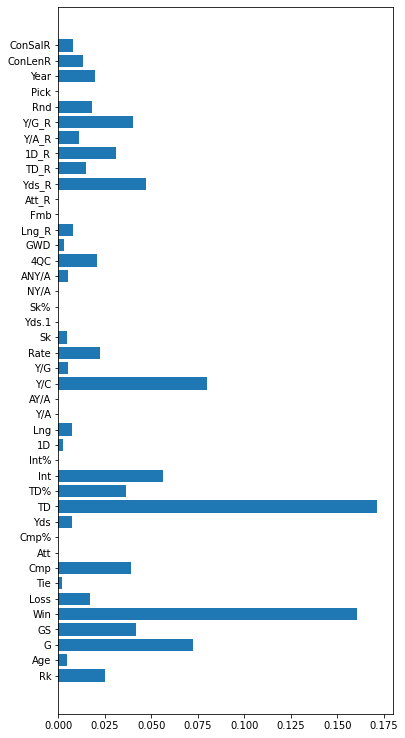

[{'Rk': 0.025386609101599386, 'Age': 0.004903537273794508, 'G': 0.07252489938379525, 'GS': 0.04205299887009074, 'Win': 0.1608084315923746, 'Loss': 0.017103953057897574, 'Tie': 0.0020274629307450174, 'Cmp': 0.039313671031859086, 'Att': 0.0, 'Cmp%': 0.0, 'Yds': 0.007662793685527507, 'TD': 0.17144581573202383, 'TD%': 0.0365749245512167, 'Int': 0.05660192574062576, 'Int%': 0.0, '1D': 0.0026234757297848087, 'Lng': 0.007352859624117429, 'Y/A': 0.0, 'AY/A': 0.0, 'Y/C': 0.08013874714143546, 'Y/G': 0.005159354147255625, 'Rate': 0.022707372615387755, 'Sk': 0.004590235202449597, 'Yds.1': 0.0, 'Sk%': 0.0, 'NY/A': 0.0, 'ANY/A': 0.005115710230800915, '4QC': 0.021076971062211534, 'GWD': 0.002892931649101099, 'Lng_R': 0.007944403850323365, 'Fmb': 0.0, 'Att_R': 0.0, 'Yds_R': 0.047380398064935554, 'TD_R': 0.0149194211852057, '1D_R': 0.031218731860531927, 'Y/A_R': 0.011271984966415849, 'Y/G_R': 0.040121563898551794, 'Rnd': 0.018300112399700107, 'Pick': 0.0, 'Year': 0.019655662035283596, 'ConLenR': 0.0132

In [11]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 42))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [12]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 8, 'max_features': 0.8468856025020536, 'max_leaves': 11}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.34488022439644817


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.7616847168453915, 'rf': 0.8101277200246786, 'xgboost': 0.809926559232294, 'extra_tree': 0.6551197756035518, 'xgb_limitdepth': 1.036318641378685}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00028177077953632057, 'wall_clock_time': 57.779999017715454, 'metric_for_logging': {'pred_time': 0.00028177077953632057, 'train_loss': 0.16604924843195287}, 'val_loss': 0.6551197756035518, 'training_iteration': 1, 'config': {'n_estimators': 8, 'max_features': 0.8468856025020536, 'max_leaves': 11}, 'config/n_estimators': 8, 'config/max_features': 0.8468856025020536, 'config/max_leaves': 11, 'experiment_tag': 'exp', 'time_total_s': 0.17376017570495605}


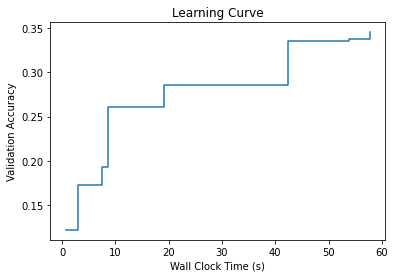

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [1.29604758 1.2114031  1.23521263 1.52520142 1.28836389 4.45527627
 2.96130099 5.11909075 1.34169411 1.31075346 1.47773341 1.55462983
 1.58971755 1.2114031  1.31075346 1.66117568 1.57051152 1.52520142
 1.47773341 1.26997068 1.77973485 1.2114031  4.86127825 1.5013919
 2.61948758 1.33456298 1.6316829  1.2114031  1.49724483 4.98516218
 1.49419573 1.47773341 1.52520142 1.31075346 1.31075346 1.2114031
 1.2114031  4.19143698 1.2114031  1.47773341 9.91666667 4.17921554
 2.75431174 1.58971755 2.57283579 5.24409075 1.34584118 1.2114031
 1.60705369 1.5577433  1.44104447 2.96130099 1.39076335 1.6738138
 1.59659519 1.46630418 4.74739583 3.82656597 3.76286555 1.34584118
 1.2114031  1.3696507  1.47773341 2.13948908 2.76753953 4.92377825
 1.2114031  1.926921   1.23521263 1.31075346 2.62246377 1.47773341
 1.2114031  2.2890625  1.2114031  1.33456298 1.59659519 1.2114031
 1.34584118 1.2114031  1.2114031  1.58235407 1.7156874  1.2114031
 1.52576185 1.53881529 1.31075346 3.95706198 1.2352

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.8165271393172849
mse = 0.7158980704194491
mae = 0.6731137179139252


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [1.47773341 4.08627825 1.2114031  1.4901137  1.29604758 3.55282091
 1.2114031  4.5166602  3.55527627 1.2114031  1.23521263 1.2114031
 2.35705369 1.42225656 1.44888563]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.1968035059225164
mse = 2.2989268541595527
mae = 1.036965554154599


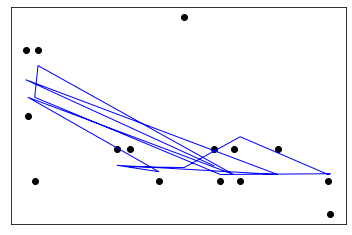

In [ ]:
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year > 2017]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player'], axis=1)
targets = feeder_test['ConLen']
feeder_test = feeder_test.drop(['ConLen'], axis=1)
y_pred = automl.predict(feeder_test)
print('Predicted labels', y_pred)

         Player     Rk   Age     G    GS   Win  Loss  Tie    Cmp     Att  ...  \
72  Jalen Hurts  23.33  24.0  45.0  34.0  23.0  11.0  0.0  648.0  1040.0  ...   

    Rnd  Pick    Year  ConLenR  ConSalR  ConLen  ConSal  FTag  PPY  %Cap  
72  2.0  53.0  2020.0      4.0    6.025     0.0     0.0   0.0  0.0   0.0  

[1 rows x 48 columns]
Predicted labels [7.03385417]


# **Regression For Contract Salary QB (AutoML)**



In [15]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/feeder.csv")

#Split into a train and test set 
feeder_train = feeder[feeder.Year < 2018]
feeder_test = feeder[feeder.Year > 2017]

# Initialize a data transformer
dtrans = DataTransformer()

#Prepare Data for modeling 
players = feeder_train[['Player']]
feeder_train = feeder_train.drop(['Player'], axis=1)
targets = feeder_train['ConSal']
features = feeder_train.drop(['ConLen', 'ConSal', 'FTag', 'PPY', '%Cap'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [16]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConSal.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 02-23 22:38:49] {2716} INFO - task = regression
[flaml.automl.automl: 02-23 22:38:49] {2718} INFO - Data split method: uniform
[flaml.automl.automl: 02-23 22:38:49] {2721} INFO - Evaluation method: cv
[flaml.automl.automl: 02-23 22:38:49] {2848} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 02-23 22:38:49] {2994} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 02-23 22:38:49] {3323} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 02-23 22:38:49] {3461} INFO - Estimated sufficient time budget=650s. Estimated necessary time budget=5s.
[flaml.automl.automl: 02-23 22:38:49] {3508} INFO -  at 0.1s,	estimator lgbm's best error=0.8498,	best estimator lgbm's best error=0.8498
[flaml.automl.automl: 02-23 22:38:49] {3323} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 02-23 22:38:49] {3508} INFO -  at 0.2s,	estimator lgbm's best error=0.8498,	best estimator 

In [19]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConSalModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "1.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#automl = loadModel("")

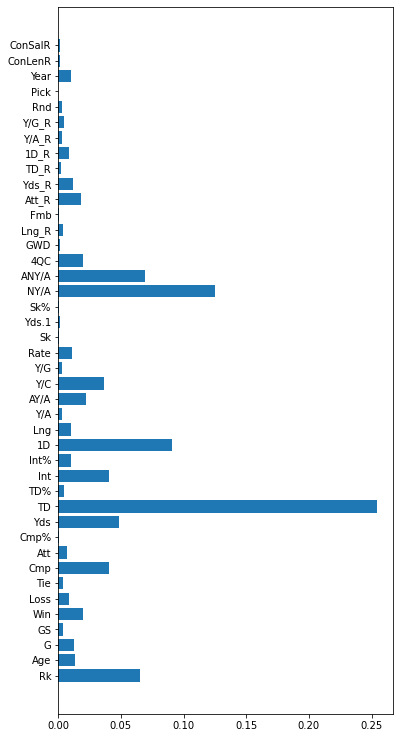

[{'Rk': 0.06527485117887027, 'Age': 0.013622103854528037, 'G': 0.012584636741440353, 'GS': 0.0034309462071680018, 'Win': 0.020078353555512924, 'Loss': 0.008648330301154243, 'Tie': 0.0035423857358833004, 'Cmp': 0.040772761412508136, 'Att': 0.007093100773850308, 'Cmp%': 0.0007160170426459217, 'Yds': 0.04887790935174746, 'TD': 0.25438708940544036, 'TD%': 0.004831106836946671, 'Int': 0.040208614327639905, 'Int%': 0.01056749283887799, '1D': 0.0910767024535805, 'Lng': 0.010394533310714408, 'Y/A': 0.003012242496235553, 'AY/A': 0.022253112728508165, 'Y/C': 0.03660938384331657, 'Y/G': 0.0030183203253191246, 'Rate': 0.011267429664344268, 'Sk': 0.00028593279894546526, 'Yds.1': 0.0016541965093636536, 'Sk%': 0.0003431213455328, 'NY/A': 0.12490009504395108, 'ANY/A': 0.06943117789835937, '4QC': 0.019697961570401837, 'GWD': 0.0016579098163938735, 'Lng_R': 0.0036454611623853157, 'Fmb': 0.0006582414684963294, 'Att_R': 0.01799828239215899, 'Yds_R': 0.011686566910961451, 'TD_R': 0.00250543850191503, '1D_R

In [17]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 42))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [18]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 10, 'max_features': 0.7665218920321769, 'max_leaves': 22}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.483629822081314


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.6435682607503171, 'rf': 0.6607010205987438, 'xgboost': 0.7334640481048547, 'extra_tree': 0.516370177918686, 'xgb_limitdepth': 0.6146724456537235}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.0003028496962327224, 'wall_clock_time': 42.688401222229004, 'metric_for_logging': {'pred_time': 0.0003028496962327224, 'train_loss': 0.006462618001938303}, 'val_loss': 0.516370177918686, 'training_iteration': 1, 'config': {'n_estimators': 10, 'max_features': 0.7665218920321769, 'max_leaves': 22}, 'config/n_estimators': 10, 'config/max_features': 0.7665218920321769, 'config/max_leaves': 22, 'experiment_tag': 'exp', 'time_total_s': 0.19327807426452637}


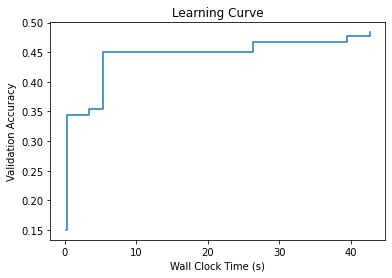

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [  5.61250755   1.81714965   3.70572993   4.96665688   3.22883241
  99.20658095  58.38548333 106.27486476   4.08987234   2.01032092
   1.90397425   5.4598373   10.87208345   1.95309183   1.95309183
   5.03666605   3.14200781   6.65077704   1.90397425   5.02991385
   6.74672126   2.19092123  94.91797143   5.29613388  27.80232419
   4.26726836   4.56881424   1.90397425   5.38801408  97.21246333
   3.60004028   3.09897621   5.44984584   5.04192275   1.95309183
   1.90397425   1.90397425 129.03669333   2.38680269   1.90397425
 450.          34.37660976  38.8243787   19.27911774  12.77675714
  94.89434143   1.95309183   1.90397425   1.90397425   6.28749796
   1.90397425 136.325        5.90244384   4.63429202   4.96665688
   6.18780232 118.715       90.46833333 152.73333333   2.85397718
   1.90397425   3.55342754   1.90397425   7.62237776  22.79227419
 111.88807048   2.30467183   3.94349672   3.0327987    1.90397425
   1.925        2.30467183   1.86626723  10.65086348   1.90

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.9901905745461421
mse = 29.809326647818573
mae = 3.839972021417799


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [  1.81714965 107.52120714   1.90397425  10.73324     10.41194064
  69.06844333   2.30467183  68.99811762  42.96150214   2.30467183
   1.90397425   1.90397425   1.90397425  12.4243362    9.55331394]


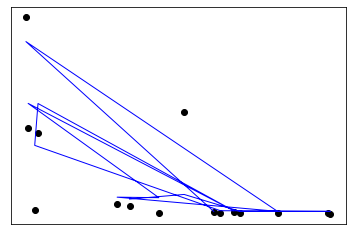

In [ ]:
# Plot regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.7156320675202419
mse = 344.9994249704443
mae = 11.10869364465649


In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year > 2017]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player'], axis=1)
targets = feeder_test['ConLen']
feeder_test = feeder_test.drop(['ConLen'], axis=1)
y_pred = automl.predict(feeder_test)
print('Predicted labels', y_pred)

         Player     Rk   Age     G    GS   Win  Loss  Tie    Cmp     Att  ...  \
72  Jalen Hurts  23.33  24.0  45.0  34.0  23.0  11.0  0.0  648.0  1040.0  ...   

    Rnd  Pick    Year  ConLenR  ConSalR  ConLen  ConSal  FTag  PPY  %Cap  
72  2.0  53.0  2020.0      4.0    6.025     0.0     0.0   0.0  0.0   0.0  

[1 rows x 48 columns]
Predicted labels [88.06726808]


# **Regression For Price Per Year QB (AutoML)**



In [20]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/feeder.csv")

#Split into a train and test set 
feeder_train = feeder[feeder.Year < 2018]
feeder_test = feeder[feeder.Year > 2017]

# Initialize a data transformer
dtrans = DataTransformer()

#Prepare Data for modeling 
players = feeder_train[['Player']]
feeder_train = feeder_train.drop(['Player'], axis=1)
targets = feeder_train['PPY']
features = feeder_train.drop(['ConLen', 'ConSal', 'FTag', 'PPY', '%Cap'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [21]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PPY.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 02-23 22:44:03] {2716} INFO - task = regression
[flaml.automl.automl: 02-23 22:44:03] {2718} INFO - Data split method: uniform
[flaml.automl.automl: 02-23 22:44:03] {2721} INFO - Evaluation method: cv
[flaml.automl.automl: 02-23 22:44:03] {2848} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 02-23 22:44:03] {2994} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 02-23 22:44:03] {3323} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 02-23 22:44:03] {3461} INFO - Estimated sufficient time budget=974s. Estimated necessary time budget=7s.
[flaml.automl.automl: 02-23 22:44:03] {3508} INFO -  at 0.2s,	estimator lgbm's best error=0.8000,	best estimator lgbm's best error=0.8000
[flaml.automl.automl: 02-23 22:44:03] {3323} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 02-23 22:44:03] {3508} INFO -  at 0.3s,	estimator lgbm's best error=0.8000,	best estimator 

In [24]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('PPYModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "1.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

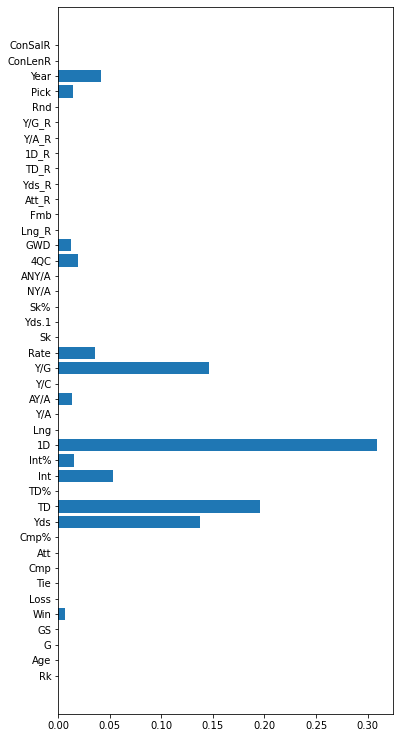

[{'Rk': 0.0, 'Age': 0.0, 'G': 0.0, 'GS': 0.0, 'Win': 0.006821085900081551, 'Loss': 0.0, 'Tie': 0.0, 'Cmp': 0.0, 'Att': 0.0, 'Cmp%': 0.0, 'Yds': 0.13743299911676854, 'TD': 0.19579369751816797, 'TD%': 0.0, 'Int': 0.05355990423611968, 'Int%': 0.015360479116522321, '1D': 0.3091770609168098, 'Lng': 0.0, 'Y/A': 0.0, 'AY/A': 0.013150108371728695, 'Y/C': 0.0, 'Y/G': 0.14597063931253493, 'Rate': 0.03541071352668708, 'Sk': 0.0, 'Yds.1': 0.0, 'Sk%': 0.0, 'NY/A': 0.0, 'ANY/A': 0.0, '4QC': 0.01915789028141966, 'GWD': 0.012465118712933751, 'Lng_R': 0.0, 'Fmb': 0.0, 'Att_R': 0.0, 'Yds_R': 0.0, 'TD_R': 0.0, '1D_R': 0.0, 'Y/A_R': 0.0, 'Y/G_R': 0.0, 'Rnd': 0.0, 'Pick': 0.013976349245057236, 'Year': 0.04172395374516893, 'ConLenR': 0.0, 'ConSalR': 0.0}]


In [22]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 42))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [23]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 5, 'max_features': 0.7977008000262807, 'max_leaves': 5}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.557902822990424


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.5655907249616619, 'rf': 0.5881671373630504, 'xgboost': 0.5348244897804821, 'extra_tree': 0.44209717700957596, 'xgb_limitdepth': 0.563477551453558}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00022879373110257662, 'wall_clock_time': 9.00086498260498, 'metric_for_logging': {'pred_time': 0.00022879373110257662, 'train_loss': 0.21972645900027848}, 'val_loss': 0.44209717700957596, 'training_iteration': 1, 'config': {'n_estimators': 5, 'max_features': 0.7977008000262807, 'max_leaves': 5}, 'config/n_estimators': 5, 'config/max_features': 0.7977008000262807, 'config/max_leaves': 5, 'experiment_tag': 'exp', 'time_total_s': 0.1394486427307129}


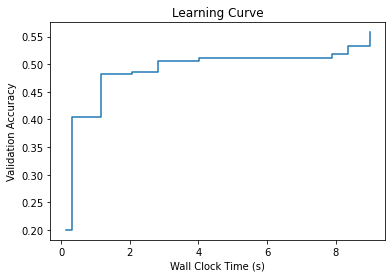

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [ 1.6931147   1.6931147   1.6931147   3.63472986  1.6931147  18.69976321
  5.27072852 19.94216226  3.2759304   1.6931147   1.6931147   7.42503845
 10.00541306  1.6931147   1.6931147   1.6931147   1.6931147   7.42503845
  1.6931147   2.52670481  4.97697516  1.6931147  18.69976321  2.80113975
 10.00541306  2.52670481  5.72620075  1.6931147   6.08279315 13.19353547
  1.6931147   1.6931147   3.2759304   3.2759304   1.6931147   1.6931147
  1.6931147  29.72876143  1.6931147   1.6931147  36.235       1.6931147
  4.38395545 10.00541306 10.00541306 12.08444325  1.6931147   1.6931147
  1.6931147   1.6931147   1.6931147   5.27072852  3.2759304   3.63472986
  2.52670481  3.2759304   9.41983657  7.42503845 36.235       1.6931147
  1.6931147   3.2759304   1.6931147   4.88399536  7.42503845 19.94216226
  1.6931147   5.72620075  1.6931147   1.6931147  11.22969571  1.6931147
  1.6931147   7.42503845  1.6931147   1.6931147   9.41983657  1.6931147
  2.52670481  1.6931147   1.6931147   3.

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.8037441540040842
mse = 16.8076307892749
mae = 2.7550610198577354


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [ 1.6931147  14.88409571  1.6931147   7.42503845  1.6931147  15.04536321
  1.6931147  16.94759136 16.94759136  1.6931147   1.6931147   1.6931147
  1.6931147   4.97697516  1.6931147 ]


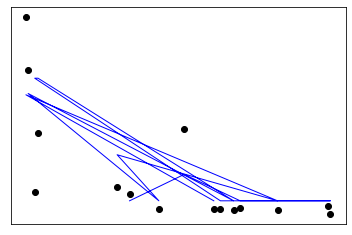

In [ ]:
# Plot regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.475348660832965
mse = 27.189424193778596
mae = 3.513952667033705


In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year > 2017]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player'], axis=1)
targets = feeder_test['ConLen']
feeder_test = feeder_test.drop(['ConLen'], axis=1)
y_pred = automl.predict(feeder_test)
print('Predicted labels', y_pred)

         Player     Rk   Age     G    GS   Win  Loss  Tie    Cmp     Att  ...  \
72  Jalen Hurts  23.33  24.0  45.0  34.0  23.0  11.0  0.0  648.0  1040.0  ...   

    Rnd  Pick    Year  ConLenR  ConSalR  ConLen  ConSal  FTag  PPY  %Cap  
72  2.0  53.0  2020.0      4.0    6.025     0.0     0.0   0.0  0.0   0.0  

[1 rows x 48 columns]
Predicted labels [7.42503845]


# **Regression For Percent Of Cap QB (AutoML)**



In [25]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/feeder.csv")

#Split into a train and test set 
feeder_train = feeder[feeder.Year < 2018]
feeder_test = feeder[feeder.Year > 2017]

# Initialize a data transformer
dtrans = DataTransformer()

#Prepare Data for modeling 
players = feeder_train[['Player']]
feeder_train = feeder_train.drop(['Player'], axis=1)
targets = feeder_train['%Cap']
features = feeder_train.drop(['ConLen', 'ConSal', 'FTag', 'PPY', '%Cap'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [26]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 02-23 22:46:41] {2716} INFO - task = regression
[flaml.automl.automl: 02-23 22:46:41] {2718} INFO - Data split method: uniform
[flaml.automl.automl: 02-23 22:46:41] {2721} INFO - Evaluation method: cv
[flaml.automl.automl: 02-23 22:46:41] {2848} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 02-23 22:46:41] {2994} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 02-23 22:46:41] {3323} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 02-23 22:46:41] {3461} INFO - Estimated sufficient time budget=863s. Estimated necessary time budget=6s.
[flaml.automl.automl: 02-23 22:46:41] {3508} INFO -  at 0.1s,	estimator lgbm's best error=0.8585,	best estimator lgbm's best error=0.8585
[flaml.automl.automl: 02-23 22:46:41] {3323} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 02-23 22:46:41] {3508} INFO -  at 0.2s,	estimator lgbm's best error=0.8585,	best estimator 

In [29]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "1.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

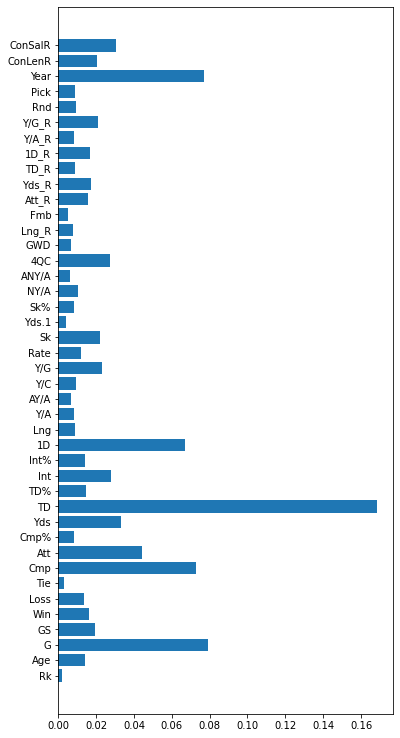

[{'Rk': 0.0022030156132028045, 'Age': 0.014167250422173695, 'G': 0.07902825883197295, 'GS': 0.019415472366073015, 'Win': 0.01630029195520624, 'Loss': 0.013695792750324239, 'Tie': 0.0028340246767832793, 'Cmp': 0.0730691449200421, 'Att': 0.04432799742636486, 'Cmp%': 0.008457077159582436, 'Yds': 0.03307779199043462, 'TD': 0.1684709748626399, 'TD%': 0.014568334676240318, 'Int': 0.027876942880069228, 'Int%': 0.013947125206880937, '1D': 0.06721800403789585, 'Lng': 0.008760186798431538, 'Y/A': 0.008364913786684896, 'AY/A': 0.0068343359205208995, 'Y/C': 0.009179344515776167, 'Y/G': 0.02309214050014049, 'Rate': 0.012248044818727415, 'Sk': 0.022207310706076237, 'Yds.1': 0.004290687903278985, 'Sk%': 0.00836885509736251, 'NY/A': 0.01028462732727598, 'ANY/A': 0.006266472215503496, '4QC': 0.0272262817188139, 'GWD': 0.006534560682818849, 'Lng_R': 0.007573418126851063, 'Fmb': 0.005242821486336492, 'Att_R': 0.015532473165747174, 'Yds_R': 0.01740073093385418, 'TD_R': 0.008891579362409297, '1D_R': 0.0166

In [27]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 42))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [28]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 25, 'max_leaves': 63, 'max_features': 1.0}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.49201704312641825


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.623476151617898, 'rf': 0.5983128215544604, 'xgboost': 0.5937568729655477, 'extra_tree': 0.5079829568735817, 'xgb_limitdepth': 0.7234395796471663}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.0003417109709519606, 'wall_clock_time': 41.625033140182495, 'metric_for_logging': {'pred_time': 0.0003417109709519606, 'train_loss': 0.00010761730007302628}, 'val_loss': 0.5079829568735817, 'training_iteration': 1, 'config': {'n_estimators': 25, 'max_leaves': 63, 'max_features': 1.0}, 'config/n_estimators': 25, 'config/max_leaves': 63, 'config/max_features': 1.0, 'experiment_tag': 'exp', 'time_total_s': 0.3313422203063965}


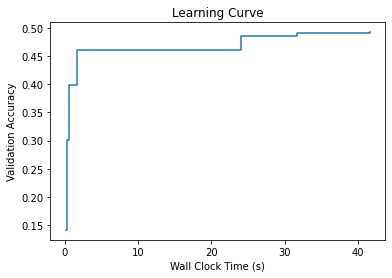

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.00510436 0.00368681 0.00314939 0.00196946 0.00155485 0.127094
 0.105214   0.1549     0.00904816 0.00201605 0.00334394 0.00502893
 0.046225   0.00322759 0.027246   0.0521     0.00633634 0.0249754
 0.0029981  0.00181904 0.02239873 0.00370641 0.09545067 0.0128294
 0.13123067 0.01180067 0.00446866 0.00253029 0.03463    0.11391267
 0.053082   0.00972173 0.00196305 0.00804417 0.00605614 0.00298036
 0.00261033 0.042059   0.00434163 0.00279181 0.0005676  0.055118
 0.071124   0.1542     0.04491167 0.10113067 0.0029166  0.00238304
 0.00277453 0.00414044 0.00303547 0.08734    0.00735729 0.02702767
 0.00363159 0.00342176 0.11162733 0.10621933 0.000424   0.03080733
 0.00246157 0.005125   0.00646648 0.00473387 0.0636     0.1451
 0.00269075 0.0071578  0.00212456 0.00317596 0.00456233 0.01037073
 0.00227805 0.01971173 0.00298881 0.00817217 0.03773933 0.023734
 0.01201613 0.00290432 0.0027421  0.00464149 0.00385111 0.00356258
 0.00167754 0.01303052 0.00399082 0.041381   0.00249213 0

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.9992646998073216
mse = 1.2561112680357278e-06
mae = 0.0008601193269912923


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [0.00754356 0.07373133 0.00358437 0.0221632  0.01097052 0.079404
 0.00321544 0.10457667 0.08088067 0.00355489 0.00333646 0.00303755
 0.00688345 0.01636983 0.01784608]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.5039944863011475
mse = 0.0008685919374013849
mae = 0.01869536134433659


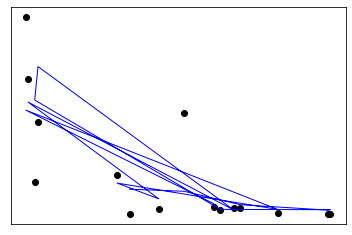

In [ ]:
# Plot regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year > 2017]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player'], axis=1)
targets = feeder_test['ConLen']
feeder_test = feeder_test.drop(['ConLen'], axis=1)
y_pred = automl.predict(feeder_test)
print('Predicted labels', y_pred)

         Player     Rk   Age     G    GS   Win  Loss  Tie    Cmp     Att  ...  \
72  Jalen Hurts  23.33  24.0  45.0  34.0  23.0  11.0  0.0  648.0  1040.0  ...   

    Rnd  Pick    Year  ConLenR  ConSalR  ConLen  ConSal  FTag  PPY  %Cap  
72  2.0  53.0  2020.0      4.0    6.025     0.0     0.0   0.0  0.0   0.0  

[1 rows x 48 columns]
Predicted labels [0.067267]


# **MultiOuput Regression QB (keras)**

In [32]:
# get the dataset
def get_dataset():
  #Load in Data
  feeder = pd.read_csv("../content/QB_data/feeder.csv") 
  #Prepare Data for modeling 
  players = feeder[['Player']]
  feeder = feeder.drop(['Player'], axis=1)
  targets = feeder[['ConLen', 'ConSal', 'PPY', '%Cap']]
  features = feeder.drop(['ConLen', 'ConSal', 'FTag', 'PPY', '%Cap'], axis=1)

  X = np.asarray(features)
  y = np.asarray(targets)
  return X, y
 
# get the model
def get_model(n_inputs, n_outputs):
 model = Sequential()
 model.add(Dense(100, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
 model.add(Dense(n_outputs))
 model.compile(loss='mae', optimizer='adam')
 return model
 
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
  results = list()
  n_inputs, n_outputs = X.shape[1], y.shape[1]
  # define evaluation procedure
  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
  # enumerate folds
  for train_ix, test_ix in cv.split(X):
    # prepare data
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    # define model
    model = get_model(n_inputs, n_outputs)
    # fit model
    model.fit(X_train, y_train, verbose=0, epochs=100)
    # evaluate model on test set
    mae = model.evaluate(X_test, y_test, verbose=0)
    # store result
    print('>%.3f' % mae)
    results.append(mae)
  return results
 
# load dataset
X, y = get_dataset()
# evaluate model
results = evaluate_model(X, y)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(results), np.std(results)))

'''pickle and save the automl object'''
def saveModel(model, versionNum):
  verNum = str(versionNum)
  with open('MultiOutKeras_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

#X, y = get_dataset()
#n_inputs, n_outputs = X.shape[1], y.shape[1]
#model = get_model(n_inputs, n_outputs)
#saveModel(model, "1.0")

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    model = pickle.load(f)
    return model
  
#model = loadModel("")

>18.001
>20.677
>21.267
>13.347
>9.928
>17.563
>17.836
>14.389
>15.052
>18.395
>14.469
>16.199
>20.447
>19.111
>16.836
MAE: 16.901 (2.977)
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-23 22:55:40         1382
variables.h5                                   2023-02-23 22:55:40        29264
metadata.json                                  2023-02-23 22:55:40           64


# **MultiOutput Regression QB (AutoML)**

In [33]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/feeder.csv")

#Split into a train and test set 
feeder_train = feeder[feeder.Year < 2018]
feeder_test = feeder[feeder.Year > 2017]

#Prepare Data for modeling 
players = feeder[['Player']]
feeder_train = feeder_train.drop(['Player'], axis=1)
targets = feeder_train[['ConLen', 'ConSal', 'PPY', '%Cap']]
features = feeder_train.drop(['ConLen', 'ConSal', 'FTag', 'PPY', '%Cap'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

In [34]:
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 120,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_MultiOut.log",
    #"max_iter": 2,
}

# train the model
model = MultiOutputRegressor(AutoML(**automl_settings))
model.fit(X_train, y_train)

[flaml.automl.automl: 02-23 22:57:20] {2716} INFO - task = regression
[flaml.automl.automl: 02-23 22:57:20] {2718} INFO - Data split method: uniform
[flaml.automl.automl: 02-23 22:57:20] {2721} INFO - Evaluation method: cv
[flaml.automl.automl: 02-23 22:57:20] {2848} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 02-23 22:57:20] {2994} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 02-23 22:57:20] {3323} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 02-23 22:57:20] {3461} INFO - Estimated sufficient time budget=742s. Estimated necessary time budget=5s.
[flaml.automl.automl: 02-23 22:57:20] {3508} INFO -  at 0.1s,	estimator lgbm's best error=0.8776,	best estimator lgbm's best error=0.8776
[flaml.automl.automl: 02-23 22:57:20] {3323} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 02-23 22:57:20] {3508} INFO -  at 0.2s,	estimator lgbm's best error=0.8776,	best estimator 

MultiOutputRegressor(estimator=AutoML(append_log=False, auto_augment=True,
                                      custom_hp={}, cv_score_agg_func=None,
                                      early_stop=False, ensemble=False,
                                      estimator_list='auto', eval_method='cv',
                                      fit_kwargs_by_estimator={},
                                      free_mem_ratio=0, hpo_method='auto',
                                      keep_search_state=True,
                                      learner_selector='sample',
                                      log_file_name='QB_MultiOut.log',
                                      log_training_metric=True,
                                      log_type='better', max_iter=None,
                                      mem_thres=4294967296, metric='r2',
                                      metric_constraints=[],
                                      min_sample_size=10000, model_history=True,
        

In [36]:
'''pickle and save the automl object'''
def saveModel(model, versionNum):
  verNum = str(versionNum)
  with open('MultiOutAutoml_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

#saveModel(model, "1.0")

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    model = pickle.load(f)
    return model
  
#model = loadModel("")

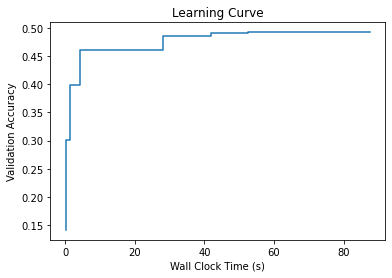

In [35]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = model.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [[1.29604758e+00 4.40612345e+00 1.69311470e+00 5.12326987e-03]
 [1.21140310e+00 2.13643478e+00 1.69311470e+00 3.54798714e-03]
 [1.23521263e+00 2.28748165e+00 1.69311470e+00 3.70844362e-03]
 [1.52520142e+00 5.89913700e+00 3.63472986e+00 2.22787536e-03]
 [1.28836389e+00 3.44071629e+00 1.69311470e+00 1.76157814e-03]
 [4.45527627e+00 1.00024157e+02 1.86997632e+01 1.27030000e-01]
 [2.96130099e+00 4.19397385e+01 5.27072852e+00 1.05225000e-01]
 [5.11909075e+00 1.08602505e+02 1.99421623e+01 1.54810000e-01]
 [1.34169411e+00 2.65354112e+00 3.27593040e+00 9.31679221e-03]
 [1.31075346e+00 2.35106952e+00 1.69311470e+00 2.05240156e-03]
 [1.47773341e+00 2.23290656e+00 1.69311470e+00 3.32468003e-03]
 [1.55462983e+00 6.97546555e+00 7.42503845e+00 4.93569048e-03]
 [1.58971755e+00 1.29295032e+01 1.00054131e+01 4.62291667e-02]
 [1.21140310e+00 2.28748165e+00 1.69311470e+00 3.24268750e-03]
 [1.31075346e+00 2.28748165e+00 1.69311470e+00 2.71500000e-02]
 [1.66117568e+00 6.57092214e+00 1.6931

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.901313109656445
mse = 15.221137379515822
mae = 1.9762744608652663


In [ ]:
# Check metrics indiviually
pred = pd.DataFrame(y_pred, columns = y_train.columns)
train = pd.DataFrame(y_train, columns = y_train.columns)
print('ConLen: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["ConLen"], train["ConLen"]))
print('ConLen: mse', '=', sklearn_metric_loss_score('mse', pred["ConLen"], train["ConLen"]))
print('ConLen: mae', '=', sklearn_metric_loss_score('mae', pred["ConLen"], train["ConLen"]))
print('--------------------------------------------------------------------------------------------')
print('ConSal: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["ConSal"], train["ConSal"]))
print('ConSal: mse', '=', sklearn_metric_loss_score('mse', pred["ConSal"], train["ConSal"]))
print('ConSal: mae', '=', sklearn_metric_loss_score('mae', pred["ConSal"], train["ConSal"]))
print('--------------------------------------------------------------------------------------------')
print('PPY: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["PPY"], train["PPY"]))
print('PPY: mse', '=', sklearn_metric_loss_score('mse', pred["PPY"], train["PPY"]))
print('PPY: mae', '=', sklearn_metric_loss_score('mae', pred["PPY"], train["PPY"]))
print('--------------------------------------------------------------------------------------------')
print('%Cap: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["%Cap"], train["%Cap"]))
print('%Cap: mse', '=', sklearn_metric_loss_score('mse', pred["%Cap"], train["%Cap"]))
print('%Cap: mae', '=', sklearn_metric_loss_score('mae', pred["%Cap"], train["%Cap"]))

ConLen: r2 = 0.8165271393172849
ConLen: mse = 0.7158980704194491
ConLen: mae = 0.6731137179139252
--------------------------------------------------------------------------------------------
ConSal: r2 = 0.985731087045017
ConSal: mse = 43.36101937724556
ConSal: mae = 4.476073511124029
--------------------------------------------------------------------------------------------
PPY: r2 = 0.8037441540040842
PPY: mse = 16.8076307892749
PPY: mae = 2.7550610198577354
--------------------------------------------------------------------------------------------
%Cap: r2 = 0.9992500582593937
%Cap: mse = 1.2811233835182962e-06
%Cap: mae = 0.0008495945653750218


In [ ]:
# Predict on Test set
y_pred = model.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [[1.47773341e+00 2.13643478e+00 1.69311470e+00 8.85382594e-03]
 [4.08627825e+00 1.07883163e+02 1.48840957e+01 6.81827381e-02]
 [1.21140310e+00 2.23290656e+00 1.69311470e+00 3.41065486e-03]
 [1.49011370e+00 8.30457531e+00 7.42503845e+00 2.72908401e-02]
 [1.29604758e+00 1.14219477e+01 1.69311470e+00 1.24538512e-02]
 [3.55282091e+00 6.51578704e+01 1.50453632e+01 7.07409524e-02]
 [1.21140310e+00 2.67812609e+00 1.69311470e+00 3.31162987e-03]
 [4.51666020e+00 7.61187339e+01 1.69475914e+01 1.05992381e-01]
 [3.55527627e+00 4.76127802e+01 1.69475914e+01 7.84434524e-02]
 [1.21140310e+00 2.67812609e+00 1.69311470e+00 4.53790692e-03]
 [1.23521263e+00 2.23290656e+00 1.69311470e+00 3.10737035e-03]
 [1.21140310e+00 2.23290656e+00 1.69311470e+00 3.35148931e-03]
 [2.35705369e+00 2.23290656e+00 1.69311470e+00 6.85555814e-03]
 [1.42225656e+00 1.19178501e+01 4.97697516e+00 1.84753171e-02]
 [1.44888563e+00 6.91485318e+00 1.69311470e+00 1.33790733e-02]]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.4583637975002012
mse = 104.38455076153697
mae = 4.0251719587915655


In [ ]:
# Check metrics indiviually
pred = pd.DataFrame(y_pred, columns = y_test.columns)
train = pd.DataFrame(y_test, columns = y_test.columns)
print('ConLen: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["ConLen"], train["ConLen"]))
print('ConLen: mse', '=', sklearn_metric_loss_score('mse', pred["ConLen"], train["ConLen"]))
print('ConLen: mae', '=', sklearn_metric_loss_score('mae', pred["ConLen"], train["ConLen"]))
print('--------------------------------------------------------------------------------------------')
print('ConSal: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["ConSal"], train["ConSal"]))
print('ConSal: mse', '=', sklearn_metric_loss_score('mse', pred["ConSal"], train["ConSal"]))
print('ConSal: mae', '=', sklearn_metric_loss_score('mae', pred["ConSal"], train["ConSal"]))
print('--------------------------------------------------------------------------------------------')
print('PPY: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["PPY"], train["PPY"]))
print('PPY: mse', '=', sklearn_metric_loss_score('mse', pred["PPY"], train["PPY"]))
print('PPY: mae', '=', sklearn_metric_loss_score('mae', pred["PPY"], train["PPY"]))
print('--------------------------------------------------------------------------------------------')
print('%Cap: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["%Cap"], train["%Cap"]))
print('%Cap: mse', '=', sklearn_metric_loss_score('mse', pred["%Cap"], train["%Cap"]))
print('%Cap: mae', '=', sklearn_metric_loss_score('mae', pred["%Cap"], train["%Cap"]))

ConLen: r2 = 0.1968035059225164
ConLen: mse = 2.2989268541595527
ConLen: mae = 1.036965554154599
--------------------------------------------------------------------------------------------
ConSal: r2 = 0.6801482328618158
ConSal: mse = 388.04894340999164
ConSal: mae = 11.530737341594913
--------------------------------------------------------------------------------------------
PPY: r2 = 0.475348660832965
PPY: mse = 27.189424193778596
PPY: mae = 3.513952667033705
--------------------------------------------------------------------------------------------
%Cap: r2 = 0.4811547903835076
%Cap: mse = 0.0009085882180451644
%Cap: mae = 0.019032272383042514


In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year > 2017]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player'], axis=1)
targets = feeder_test['ConLen']
feeder_test = feeder_test.drop(['ConLen'], axis=1)
y_pred = model.predict(feeder_test)
print('Predicted labels', y_pred)

         Player     Rk   Age     G    GS   Win  Loss  Tie    Cmp     Att  ...  \
72  Jalen Hurts  23.33  24.0  45.0  34.0  23.0  11.0  0.0  648.0  1040.0  ...   

    Rnd  Pick    Year  ConLenR  ConSalR  ConLen  ConSal  FTag  PPY  %Cap  
72  2.0  53.0  2020.0      4.0    6.025     0.0     0.0   0.0  0.0   0.0  

[1 rows x 48 columns]
Predicted labels [[7.03385417e+00 9.67338843e+01 7.42503845e+00 6.16417857e-02]]
